# **Advances in Modeling High-Energy Astrophysical Sources:** 
## Insights from recent multimessenger discoveries 

### *Gammapy Hands-on: 1st session*

#### **Installation**

Brief suggestion of installation, check [here](https://docs.gammapy.org/dev/getting-started/index.html#getting-started) for more

In [ ]:
# Conda installation, recommended to create an environment

$ conda create --name gammapy-sexten
$ conda activate gammapy-sexten # stop with '$ conda deactivate'
$ conda install -c conda-forge gammapy
$ conda install notebook

## Alternatively, you could install it via pip
$ pip install gammapy


*Disclaimer*:
The following tutorials are based almost completely on the those available at the [gammapy docs](https://docs.gammapy.org/dev/index.html). All credit of images, data, and other materials should go to the original authors. You will also find more information there that the one we can cover here. You might also want to have a look at this review on Gamma-Ray Data Analysis by [Denys Malyshev and Lars Mohrmann (2023)](https://arxiv.org/pdf/2309.02966).

#### **Survey**

For the purpose of adapting Thursday's tutorials to your needs, please fill the survey [here](https://docs.google.com/forms/d/e/1FAIpQLSfMyPLGY3D4OmIxL_lUPgcWmL9IDgGhUnAJ-Kq2mwMNi_6ZQw/viewform?usp=header). If possible wait until the end.

#### **Introduction**

Relevant elements in a gammapy analysis:
- Sky maps
- Event lists
- Source catalogs (i.e. source positions)
- Spectral models

![workflow](data-flow-gammapy.png)

You can do the analysis through scripts or command line tools. We will do the second because it is easier to follow, but the first one is highly recommended for long / memory demanding analyses.

**Gammapy relevance comes from multi-instrument data represented in a unified way**, so you can produce a joint fit with a maximum-likelihood-based approach (see [Mattox et al. 1996](https://articles.adsabs.harvard.edu/pdf/1996ApJ...461..396M) for a comprehensive description for EGRET data).

Completely biased examples of decent results obtained by benefiting from those gammapy advantages:
- [IGMF study with Fermi-LAT and H.E.S.S.](https://iopscience.iop.org/article/10.3847/2041-8213/acd777/pdf)
- [Spectro-morphological study of the Crab Nebula with Fermi-LAT and H.E.S.S.](https://www.aanda.org/articles/aa/pdf/2024/06/aa48651-23.pdf)

So, how to compute science products? N-D analyses

**1D**

![workflow](1d-analysis-image.png)

**2D**

![workflow](2d-analysis-image.png)

**3D** 

![workflow](3d-analysis-image.png)



#### **Exploring CTAO data**

In [1]:
### Setup 
import os
from pathlib import Path
from astropy import units as u

# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from gammapy.data import DataStore, EventList
from gammapy.irf import EffectiveAreaTable2D, load_irf_dict_from_file


In [2]:
### Check setup
from gammapy.utils.check import check_tutorials_setup

check_tutorials_setup()


System:

	python_executable      : /home/willde/anaconda3/envs/gammapy-sexten/bin/python 
	python_version         : 3.12.11    
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.3        
	path                   : /home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy 


Other packages:

	numpy                  : 2.3.0      
	scipy                  : 1.16.0     
	astropy                : 7.1.0      
	regions                : 0.10       
	click                  : 8.2.1      
	yaml                   : 6.0.2      
	IPython                : 9.1.0      
	jupyterlab             : 4.3.4      
	matplotlib             : 3.10.3     
	pandas                 : not installed 
	healpy                 : not installed 
	iminuit                : 2.31.1     
	sherpa                 : not installed 
	naima                  : not installed 
	emcee                  : not installed 
	corner                 : 

In [3]:
### Get files from the CTA first data challenge (2017-2018)
!ls -1 $GAMMAPY_DATA/cta-1dc
!ls -1 $GAMMAPY_DATA/cta-1dc/data/baseline/gps
!ls -1 $GAMMAPY_DATA/cta-1dc/caldb/data/cta/1dc/bcf/South_z20_50h
!ls -1 $GAMMAPY_DATA/cta-1dc/index/gps


caldb
data
index
make.py
README.md
gps_baseline_110380.fits
gps_baseline_111140.fits
gps_baseline_111159.fits
gps_baseline_111630.fits
irf_file.fits
hdu-index.fits.gz
obs-index.fits.gz


In [4]:
## Set a CALDB environment variable
os.environ["CALDB"] = os.environ["GAMMAPY_DATA"] + "/cta-1dc/caldb"

In [5]:
## Load data
data_store = DataStore.from_dir("$GAMMAPY_DATA/cta-1dc/index/gps")
print(data_store)

Data store:
HDU index table:
BASE_DIR: /home/willde/Programes/gammapy-datasets/1.0.1/cta-1dc/index/gps
Rows: 24
OBS_ID: 110380 -- 111630
HDU_TYPE: [np.str_('aeff'), np.str_('bkg'), np.str_('edisp'), np.str_('events'), np.str_('gti'), np.str_('psf')]
HDU_CLASS: [np.str_('aeff_2d'), np.str_('bkg_3d'), np.str_('edisp_2d'), np.str_('events'), np.str_('gti'), np.str_('psf_3gauss')]


Observation table:
Observatory name: 'CTA first data challenge (1DC)'
Number of observations: 4



In [6]:
data_store.obs_table[["OBS_ID", "GLON_PNT", "GLAT_PNT", "IRF"]]


<ObservationTable length=4>
OBS_ID      GLON_PNT           GLAT_PNT           IRF     
              deg                deg                      
int64       float64            float64          bytes13   
------ ------------------ ------------------ -------------
110380  359.9999912037958 -1.299995937905366 South_z20_50h
111140  358.4999833830074 1.3000020211954284 South_z20_50h
111159 1.5000056568267741  1.299940468335294 South_z20_50h
111630  263.9999985700299 -1.299980552289047 South_z20_50h

In [7]:
observation = data_store.obs(110380)
print(observation)

Observation

	obs id            : 110380 
 	tstart            : 59235.50
	tstop             : 59235.52
	duration          : 1800.00 s
	pointing (icrs)   : 267.7 deg, -29.6 deg

	deadtime fraction : 2.0%



In [8]:
events = observation.events
display(events.table)

<Table length=106217>
EVENT_ID        TIME           RA     ...     DETX        DETY    MC_ID
                 s            deg     ...     deg         deg          
 uint32       float64       float32   ...   float32     float32   int32
-------- ----------------- ---------- ... ----------- ----------- -----
       1 664502403.0454683  -92.63541 ...  -0.9077294  -0.2727693     2
       2 664502405.2579999  -92.64103 ...   1.3443842  -0.2838398     2
       3 664502408.8205513  -93.20372 ...   1.0049409  -0.7769775     2
       4 664502409.0143764  -94.03383 ...  0.32684833   -1.496021     2
       5 664502414.8090746 -93.330505 ...   -0.716062  -0.8733348     2
       6 664502415.5855484  -93.23232 ...   1.0170497  -0.8021856     2
       7 664502416.0332305  -92.62048 ... -0.17455244 -0.26183704     2
       8  664502417.712146  -93.75603 ...  -0.6013596   -1.242136     2
       9 664502419.5261248  -94.33253 ... -0.37238783  -1.7444801     2
     ...               ...        ... ...         ...         ...   ...
  106209 664504199.8737524  -92.56297 ...  0.07247467 -0.21244664     1
  106210 664504199.8762689  -95.91761 ... -0.31146556    -3.12023     1
  106211 664504199.8870658  -92.75952 ...   0.9550883   -0.386774     1
  106212 664504199.9285337  -94.80082 ...   0.6057789  -2.1711502     1
  106213 664504199.9315486 -89.076965 ...   0.2067051   2.8250456     1
  106214 664504199.9442778  -93.28163 ...  -0.4071093 -0.83374184     1
  106215 664504199.9560002   -92.4204 ... -0.30353945 -0.08807102     1
  106216 664504199.9636843 -93.404785 ...  0.81124264 -0.95175004     1
  106217 664504199.9682832  -93.45982 ...  -0.5100452   -0.987028     1

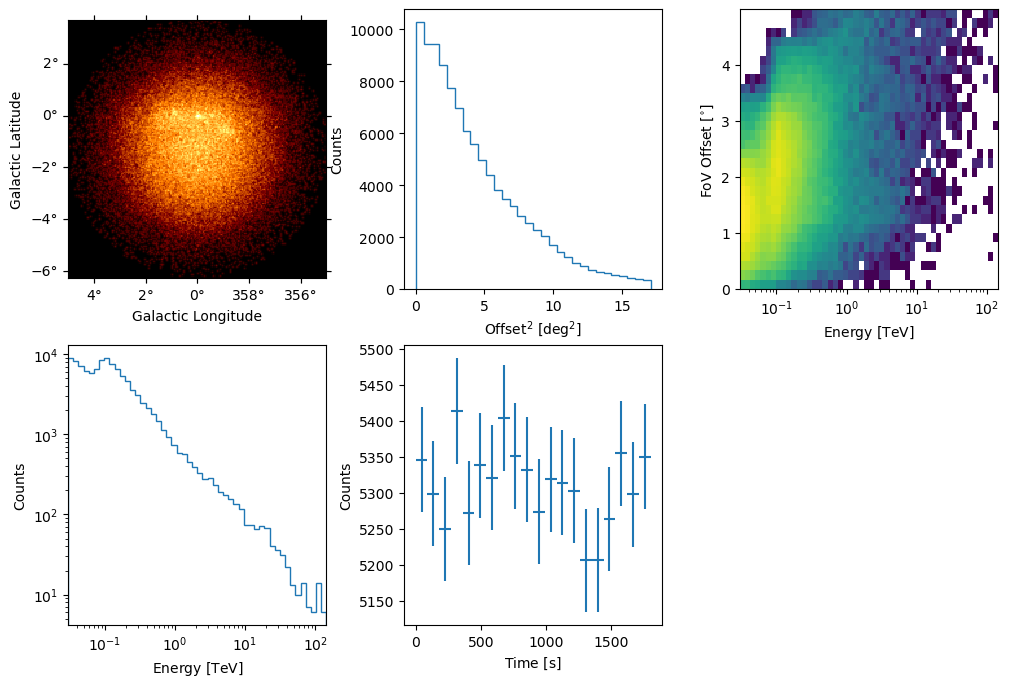

In [9]:
events.peek()
plt.show()

The instrument response functions (IRFs) are crucial for a proper derivation of physical properties!

In [10]:
observation.available_irfs

# Instead of using the observation, you could load them from a file
# irfs = load_irf_dict_from_file(irf_filename)

['aeff', 'edisp', 'psf', 'bkg']

EffectiveAreaTable2D
--------------------

  axes  : ['energy_true', 'offset']
  shape : (42, 6)
  ndim  : 2
  unit  : m2
  dtype : >f4



/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/irf/effective_area.py:105: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, area, label=label, **kwargs)
/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/irf/effective_area.py:147: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(offset_axis.center, area, label=label, **kwargs)


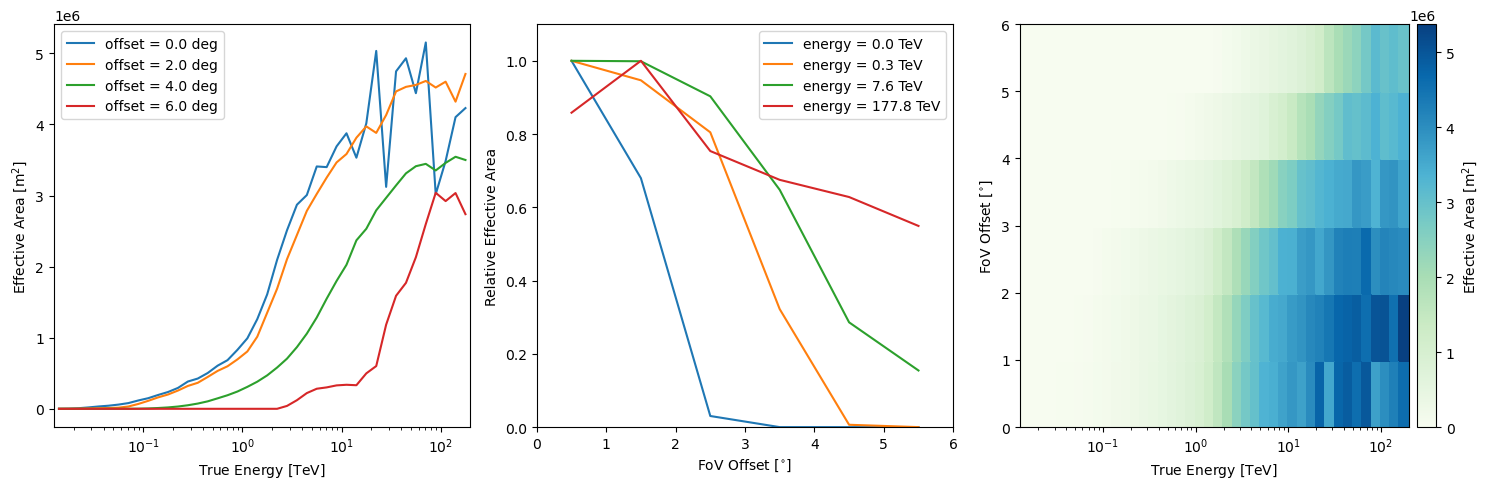

3.783587001383003 km2


In [11]:
### Effective area

# Print  general information
aeff = observation.aeff
print(aeff)

# Plot quick properties
aeff.peek()
plt.show()

# You can check specific properties
print(aeff.evaluate(energy_true="10 TeV", offset="0 deg").to("km2"))


EnergyDependentMultiGaussPSF
----------------------------

  axes      : ['energy_true', 'offset']
  shape     : (25, 6)
  ndim      : 2
  parameters: ['sigma_1', 'sigma_2', 'sigma_3', 'scale', 'ampl_2', 'ampl_3']



/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/irf/psf/core.py:164: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_true.center, radius, **plot_kwargs)


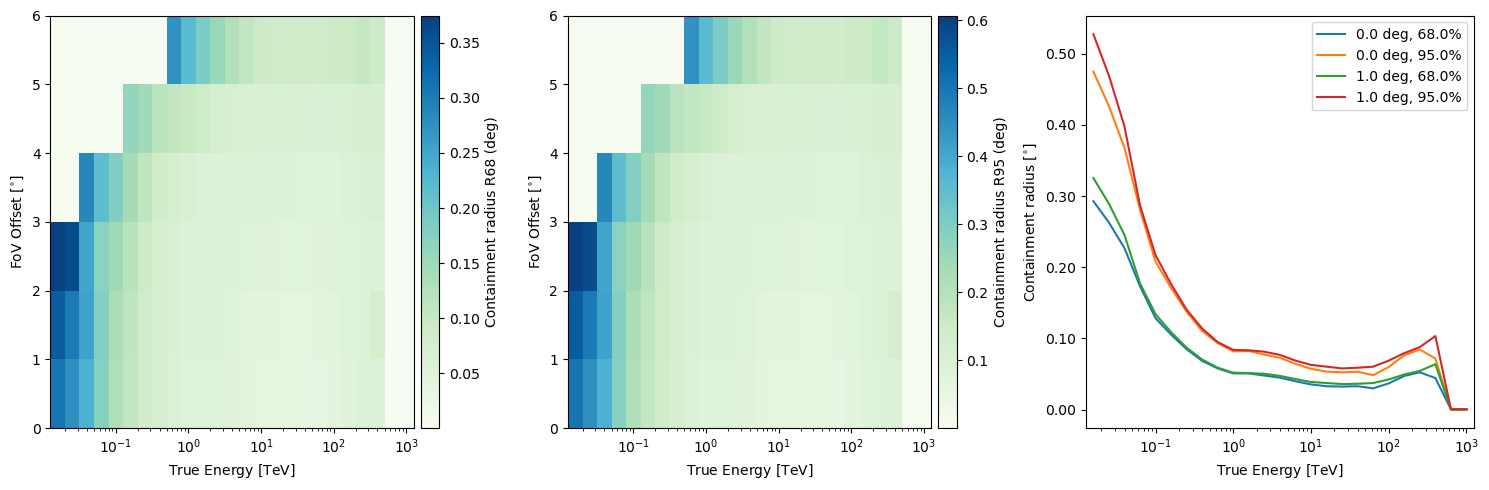

In [12]:
### Point spread function

# Print  general information
psf = observation.psf
print(psf)

# Plot quick properties
psf.peek()
plt.show()


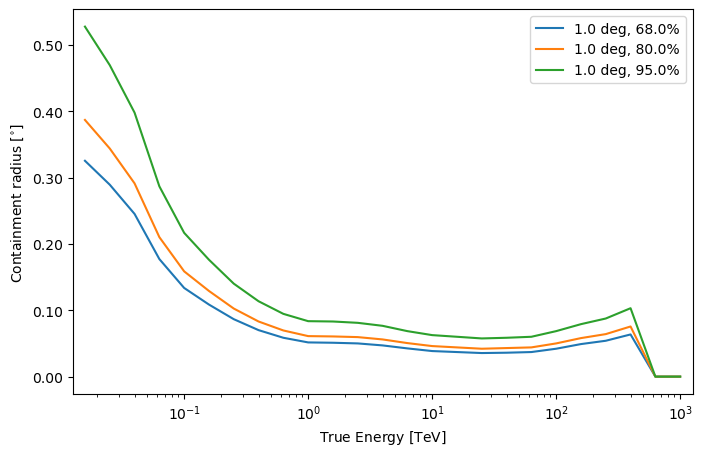

In [13]:
plt.figure(figsize=(8, 5))
psf.plot_containment_radius_vs_energy(
    offset=[1] * u.deg, fraction=[0.68, 0.8, 0.95]
)
plt.show()


EnergyDispersion2D
------------------

  axes  : ['energy_true', 'migra', 'offset']
  shape : (500, 300, 6)
  ndim  : 3
  unit  : 
  dtype : >f4



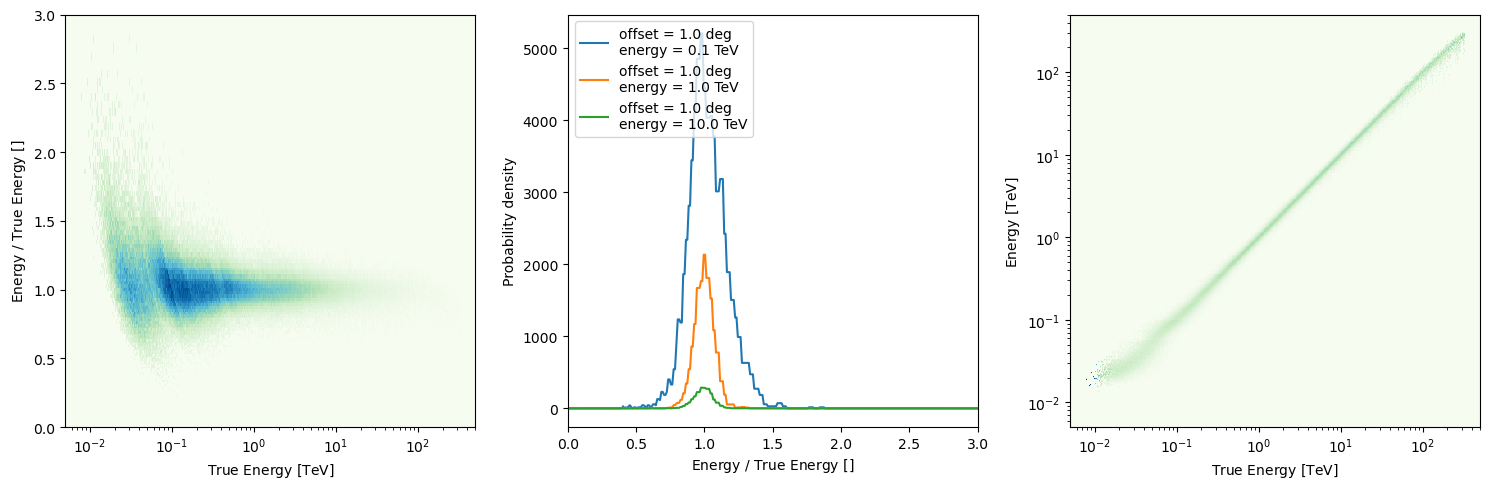

In [14]:
### Energy dispersion

# Print  general information
edisp = observation.edisp
print(edisp)

# Plot quick properties
edisp.peek()
plt.show()

Additionally you could have unfiltered background. This corresponds to hadronic and electron air shower events that pass CTAO selection cuts. It was given as a function of field of view coordinates, although it is radially symmetric. This background is given in 1/MeV/s/sr

Invalid unit found in background table! Assuming (s-1 MeV-1 sr-1)
/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/irf/background.py:405: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(offset_axis.center, bkg, label=label, **kwargs)
/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/irf/background.py:445: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, bkg, label=label, **kwargs)


Background3D
------------

  axes  : ['energy', 'fov_lon', 'fov_lat']
  shape : (21, 36, 36)
  ndim  : 3
  unit  : 1 / (MeV s sr)
  dtype : >f4



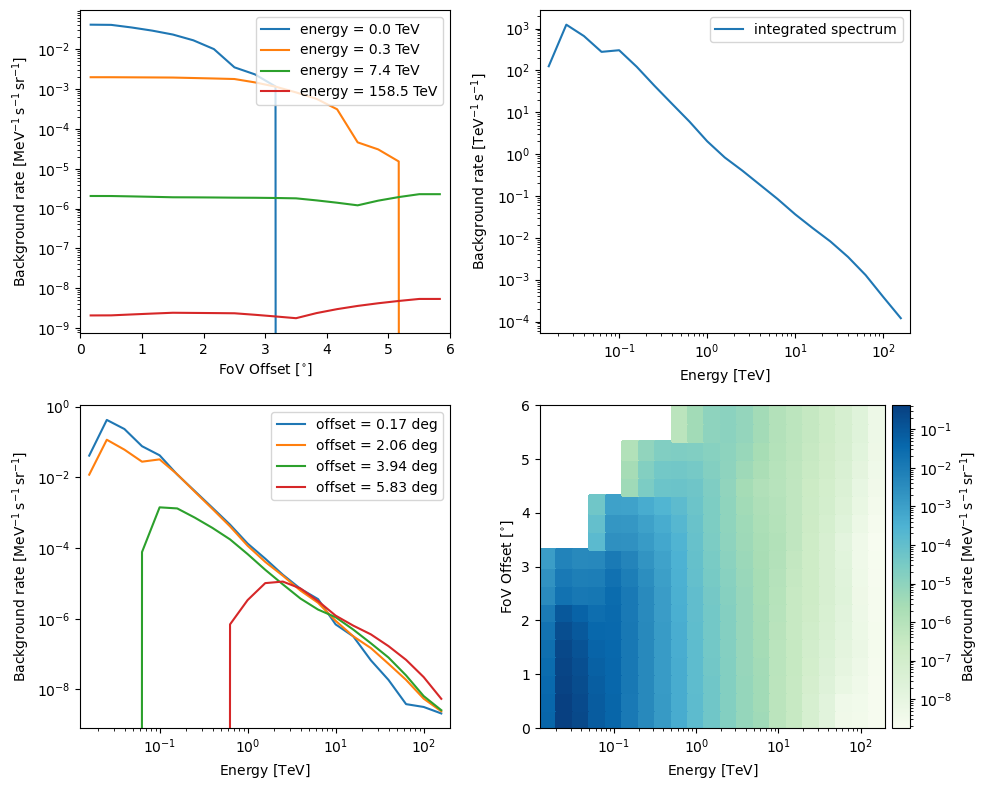

1.2053315944536949e-05 1 / (MeV s sr)


In [15]:
### Background

# Print  general information
bkg = observation.bkg
print(bkg)

# Plot quick properties
bkg.peek()
plt.show()

# Example of how to extract a value
print(bkg.evaluate(energy="3 TeV", fov_lon="1 deg", fov_lat="0 deg"))

... and now to the analysis itself!

#### **1D analysis: Extracting a spectrum of the Crab**

We use the DataStore to retrieve a list of selected observations. Then, we define the ON region containing the source and the geometry of the SpectrumDataset object we want to produce. We then create the corresponding dataset Maker.

In summary, we have to:

1) Create a DataStore pointing to the relevant data

2) Apply an observation selection to produce a list of observations, a Observations object.

3) Define a geometry of the spectrum we want to:
      
    - Create a CircleSkyRegion for the ON extraction region

    - Create a MapAxis for the energy binnings: one for the reconstructed (i.e.measured) energy, the other for the true energy (i.e.the one used by IRFs and models)

4) Create the necessary makers :

    - the spectrum dataset maker : SpectrumDatasetMaker - the OFF background maker, here a ReflectedRegionsBackgroundMaker

    - and the safe range maker : SafeMaskMaker

5) Perform the data reduction loop. And for every observation:

    - Apply the makers sequentially to produce a SpectrumDatasetOnOff

    - Append it to list of datasets

6) Define the SkyModel to apply to the dataset.

7) Create a Fit object and run it to fit the model parameters

8) Apply a FluxPointsEstimator to compute flux points for the spectral part of the fit.

In contrast with 3D analyses we will use a more "classical" analysis approach here to establish a detection or not of the source.

In [16]:
# Load necessary packages
from pathlib import Path
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion

# %matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display
from gammapy.data import DataStore
from gammapy.datasets import (
    Datasets,
    FluxPointsDataset,
    SpectrumDataset,
)
from gammapy.estimators import FluxPointsEstimator
from gammapy.estimators.utils import resample_energy_edges
from gammapy.makers import (
    ReflectedRegionsBackgroundMaker,
    SafeMaskMaker,
    SpectrumDatasetMaker,
)
from gammapy.maps import MapAxis, RegionGeom, WcsGeom
from gammapy.modeling import Fit, Parameter
from gammapy.modeling.models import (
    ExpCutoffPowerLawSpectralModel,
    SkyModel,
    create_crab_spectral_model,
)

In [17]:
from gammapy.utils.check import check_tutorials_setup
from gammapy.visualization import plot_spectrum_datasets_off_regions

check_tutorials_setup()


System:

	python_executable      : /home/willde/anaconda3/envs/gammapy-sexten/bin/python 
	python_version         : 3.12.11    
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.3        
	path                   : /home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy 


Other packages:

	numpy                  : 2.3.0      
	scipy                  : 1.16.0     
	astropy                : 7.1.0      
	regions                : 0.10       
	click                  : 8.2.1      
	yaml                   : 6.0.2      
	IPython                : 9.1.0      
	jupyterlab             : 4.3.4      
	matplotlib             : 3.10.3     
	pandas                 : not installed 
	healpy                 : not installed 
	iminuit                : 2.31.1     
	sherpa                 : not installed 
	naima                  : not installed 
	emcee                  : not installed 
	corner                 : 

In [18]:
# We will exctract 4 H.E.S.S. observations of the Crab

datastore = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1/")
obs_ids = [23523, 23526, 23559, 23592]
observations = datastore.get_observations(obs_ids)

Observation

	obs id            : 23592 
 	tstart            : 53347.91
	tstop             : 53347.93
	duration          : 1686.00 s
	pointing (icrs)   : 82.0 deg, 22.0 deg

	deadtime fraction : 6.2%



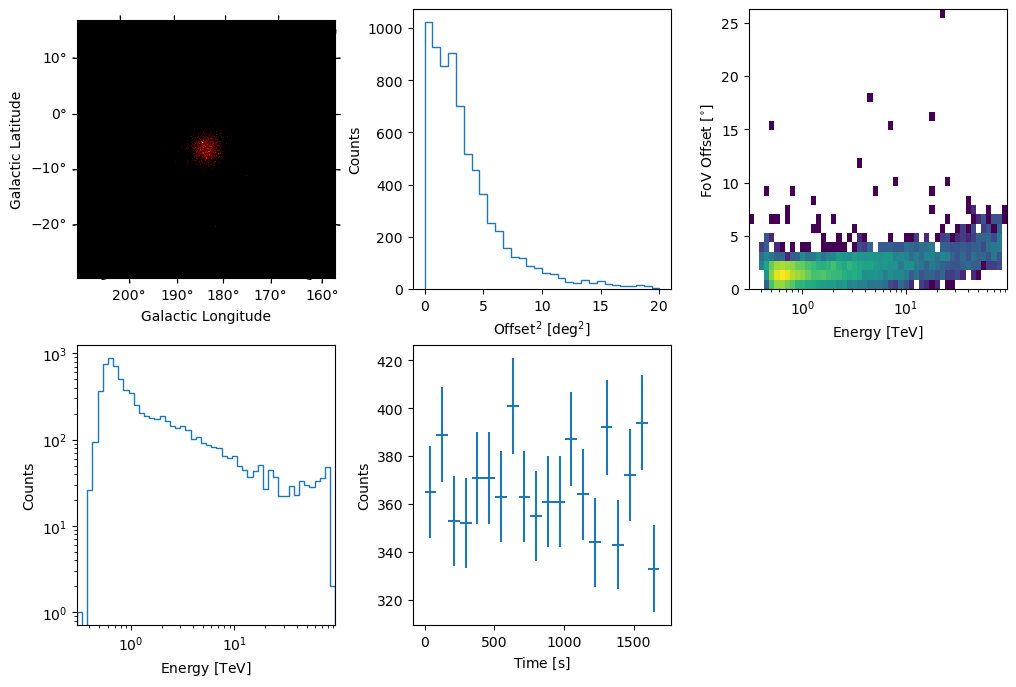

In [19]:
# We could test what we have learned before and check the data of one of the observations
observation = datastore.obs(23592)
print(observation) # Note that the duration is 28 min, typical of H.E.S.S. runs
observation.events.peek()

In [20]:
# Extract signal extraction region
target_position = SkyCoord(ra=83.63, dec=22.01, unit="deg", frame="icrs")
on_region_radius = Angle("0.11 deg") # Tipically ~ PSF
on_region = CircleSkyRegion(center=target_position, radius=on_region_radius)

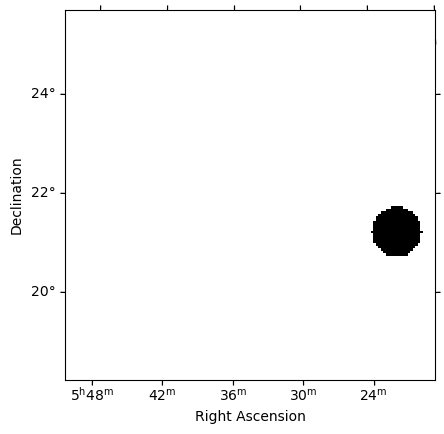

In [21]:
# Create exclusion mask
# In IACT classical analysis you do not incorporate background sources 
# as in a likelihood analysis
# Instead, you mask them

# In 3D analysis we will see a different approach


# We want to mask the gamma-ray bright AGN called RGB J0521+212 at GLON = 183.604 deg and GLAT = -8.708 deg
exclusion_region = CircleSkyRegion(
    center=SkyCoord(183.604, -8.708, unit="deg", frame="galactic"),
    radius=0.5 * u.deg,
)

skydir = target_position.galactic
geom = WcsGeom.create(
    npix=(150, 150), binsz=0.05, skydir=skydir, proj="TAN", frame="icrs"
)

exclusion_mask = ~geom.region_mask([exclusion_region])
exclusion_mask.plot()
plt.show()

In [22]:
# Define energy range (observed and true)
energy_axis = MapAxis.from_energy_bounds(
    0.1, 40, nbin=10, per_decade=True, unit="TeV", name="energy"
)
energy_axis_true = MapAxis.from_energy_bounds(
    0.05, 100, nbin=20, per_decade=True, unit="TeV", name="energy_true"
)

# Define geometry
geom = RegionGeom.create(region=on_region, axes=[energy_axis])
dataset_empty = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true)

# Create the Spectral maker
dataset_maker = SpectrumDatasetMaker(
    containment_correction=True, selection=["counts", "exposure", "edisp"]
)

# Create the background (using reflected region method, not template) and mask maker
bkg_maker = ReflectedRegionsBackgroundMaker(exclusion_mask=exclusion_mask)
safe_mask_maker = SafeMaskMaker(methods=["aeff-max"], aeff_percent=10)


In [23]:
# We want to combine all observations and produce the dataset itself

datasets = Datasets()

for obs_id, observation in zip(obs_ids, observations):
    dataset = dataset_maker.run(dataset_empty.copy(name=str(obs_id)), observation)
    dataset_on_off = bkg_maker.run(dataset, observation)
    dataset_on_off = safe_mask_maker.run(dataset_on_off, observation)
    datasets.append(dataset_on_off)

print(datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : 23523
  Instrument : HESS
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : 23526
  Instrument : HESS
  Models     : 

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : 23559
  Instrument : HESS
  Models     : 

Dataset 3: 

  Type       : SpectrumDatasetOnOff
  Name       : 23592
  Instrument : HESS
  Models     : 




/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/regions/shapes/circle.py:160: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)
/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/visualization/datasets.py:84: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handle = Patch(**plot_kwargs)


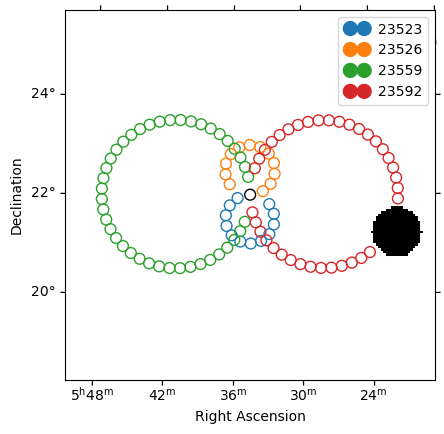

In [24]:
plt.figure()
ax = exclusion_mask.plot() # Mask
on_region.to_pixel(ax.wcs).plot(ax=ax, edgecolor="k") #
plot_spectrum_datasets_off_regions(ax=ax, datasets=datasets)
plt.show()


In [25]:
# So let's check if we have a signal
info_table = datasets.info_table(cumulative=True)

display(info_table)

<Table length=4>
  name  counts       excess      ...   acceptance_off          alpha       
                                 ...                                       
  str7  int64       float64      ...      float64             float64      
------- ------ ----------------- ... ------------------ -------------------
stacked    149            139.25 ...              216.0  0.0833333358168602
stacked    303            280.75 ... 443.99993896484375  0.0833333432674408
stacked    439 408.7743835449219 ...  1100.523681640625 0.05088486522436142
stacked    550  512.135498046875 ... 1698.3189697265625 0.04357249662280083

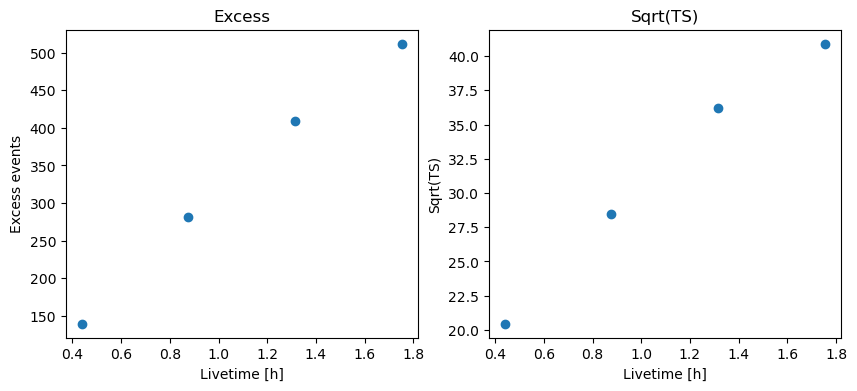

In [26]:
fig, (ax_excess, ax_sqrt_ts) = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax_excess.plot(
    info_table["livetime"].to("h"),
    info_table["excess"],
    marker="o",
    ls="none",
)

ax_excess.set_title("Excess")
ax_excess.set_xlabel("Livetime [h]")
ax_excess.set_ylabel("Excess events")

ax_sqrt_ts.plot(
    info_table["livetime"].to("h"),
    info_table["sqrt_ts"],
    marker="o",
    ls="none",
)

ax_sqrt_ts.set_title("Sqrt(TS)")
ax_sqrt_ts.set_xlabel("Livetime [h]")
ax_sqrt_ts.set_ylabel("Sqrt(TS)")
plt.show()


We have a detection! We can save the datasets that we generated

In [27]:
path = Path("spectrum_analysis")
path.mkdir(exist_ok=True)
datasets.write(filename=path / "spectrum_dataset.yaml", overwrite=True)

# And load them with

#datasets = Datasets.read(filename=path / "spectrum_dataset.yaml")

Let's derive now a spectrum. To extract spectral properties we will do a joint likelihood fit to all observations. We will assume here a Power Law with an exponential cut-off, but you can get creative [here](https://docs.gammapy.org/dev/user-guide/model-gallery/index.html#model-gallery) or from the following list:

In [28]:
from gammapy.modeling.models import SPECTRAL_MODEL_REGISTRY

print(SPECTRAL_MODEL_REGISTRY)

Registry
--------

ConstantSpectralModel                     : ['ConstantSpectralModel', 'const'] 
CompoundSpectralModel                     : ['CompoundSpectralModel', 'compound'] 
PowerLawSpectralModel                     : ['PowerLawSpectralModel', 'pl'] 
PowerLaw2SpectralModel                    : ['PowerLaw2SpectralModel', 'pl-2'] 
BrokenPowerLawSpectralModel               : ['BrokenPowerLawSpectralModel', 'bpl'] 
SmoothBrokenPowerLawSpectralModel         : ['SmoothBrokenPowerLawSpectralModel', 'sbpl'] 
PiecewiseNormSpectralModel                : ['PiecewiseNormSpectralModel', 'piecewise-norm'] 
ExpCutoffPowerLawSpectralModel            : ['ExpCutoffPowerLawSpectralModel', 'ecpl'] 
ExpCutoffPowerLaw3FGLSpectralModel        : ['ExpCutoffPowerLaw3FGLSpectralModel', 'ecpl-3fgl'] 
SuperExpCutoffPowerLaw3FGLSpectralModel   : ['SuperExpCutoffPowerLaw3FGLSpectralModel', 'secpl-3fgl'] 
SuperExpCutoffPowerLaw4FGLDR3SpectralModel: ['SuperExpCutoffPowerLaw4FGLDR3SpectralModel', 'secpl-4fgl-d

In [29]:
### We a assume a Power Law with an exponential cut-off
spectral_model = ExpCutoffPowerLawSpectralModel(
    amplitude=1e-12 * u.Unit("cm-2 s-1 TeV-1"),
    index=2,
    lambda_=0.1 * u.Unit("TeV-1"),
    reference=1 * u.TeV,
)
model = SkyModel(spectral_model=spectral_model, name="crab") # We give it the cute name of crab

datasets.models = [model]
# So we are stating that our datasets (and the events within) 
# should be explained by the model defined


# You can see the parameters:
print(model.parameters.to_table())

## And fix or free as you want
#model.freeze()
#model.unfreeze()
#model.spectral_model.amplitude.frozen=True


type    name     value         unit        error   min max frozen link prior
---- --------- ---------- -------------- --------- --- --- ------ ---- -----
         index 2.0000e+00                0.000e+00 nan nan  False           
     amplitude 1.0000e-12 TeV-1 s-1 cm-2 0.000e+00 nan nan  False           
     reference 1.0000e+00            TeV 0.000e+00 nan nan   True           
       lambda_ 1.0000e-01          TeV-1 0.000e+00 nan nan  False           
         alpha 1.0000e+00                0.000e+00 nan nan   True           


In [30]:
# Let's do the fit...
fit_joint = Fit()
result_joint = fit_joint.run(datasets=datasets)

print(result_joint)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 244
	total stat : 86.12

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [31]:
# and we can check the best parameters
model_best_joint = model.copy()
display(result_joint.models.to_parameters_table())


<Table length=5>
model type    name     value         unit      ...   max   frozen link prior
 str4 str1    str9    float64       str14      ... float64  bool  str1  str1
----- ---- --------- ---------- -------------- ... ------- ------ ---- -----
 crab          index 2.2727e+00                ...     nan  False           
 crab      amplitude 4.7913e-11 TeV-1 s-1 cm-2 ...     nan  False           
 crab      reference 1.0000e+00            TeV ...     nan   True           
 crab        lambda_ 1.2097e-01          TeV-1 ...     nan  False           
 crab          alpha 1.0000e+00                ...     nan   True

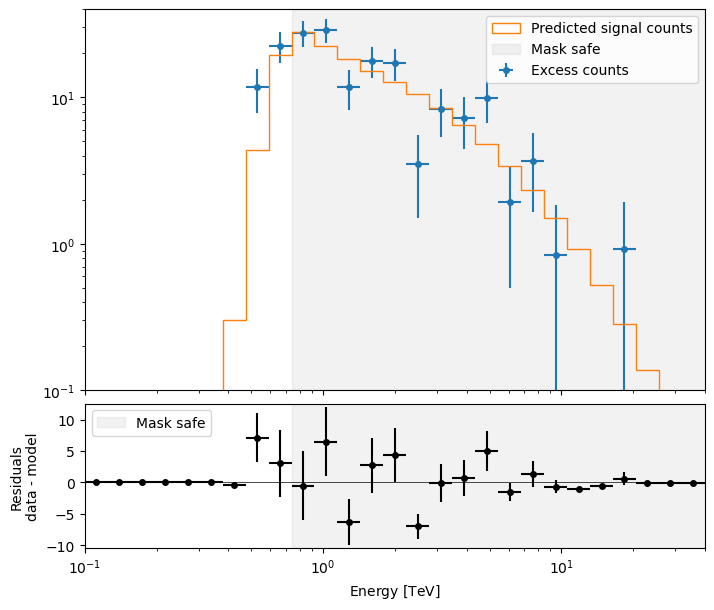

In [32]:
# We can do a first check 
ax_spectrum, ax_residuals = datasets[0].plot_fit()
ax_spectrum.set_ylim(0.1, 40)
plt.show()

But please, always give things in useful units! So let's derive the flux points. This is very easy, just use the instance "FluxPointsEstimator":

In [33]:
#norm = Parameter(name="norm", value=1.0)

fpe = FluxPointsEstimator(
    energy_edges=energy_axis.edges, source="crab", selection_optional="all") 
# You can control the errors and upper limits with hidden parameters "n_sigma" and "n_sigma_ul"
# We are using here the default edges of our analysis, but we could use whatever we want

# These two lines are only here to allow the generation of upperlimits in very faint sourcesm otherwise they are simply not computed
fpe.norm.scan_min = 0.01
fpe.norm.scan_max = 50

flux_points = fpe.run(datasets=datasets)
display(flux_points.to_table(sed_type="dnde", formatted=True))

<Table length=27>
 e_ref   e_min   e_max        dnde      ...   counts   success    norm_scan   
  TeV     TeV     TeV   1 / (TeV s cm2) ...                                   
float64 float64 float64     float64     ... float64[4]   bool    float64[11]  
------- ------- ------- --------------- ... ---------- ------- ---------------
  0.112   0.100   0.125             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.139   0.125   0.156             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.174   0.156   0.195             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.217   0.195   0.243             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.271   0.243   0.303             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.339   0.303   0.379             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.423   0.379   0.473             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.528   0.473   0.590             nan ... 0.0 .. 0.0   False 0.010 .. 50.000
  0.659   0.590   0.737       1.132e-10 ... 0.0 .. 0.0    True 0.010 .. 50.000
    ...     ...     ...             ... ...        ...     ...             ...
  6.066   5.429   6.778       3.779e-13 ... 2.0 .. 3.0    True 0.010 .. 50.000
  7.573   6.778   8.462       2.240e-13 ... 4.0 .. 1.0    True 0.010 .. 50.000
  9.454   8.462  10.564       1.190e-13 ... 1.0 .. 4.0    True 0.010 .. 50.000
 11.803  10.564  13.189       5.214e-14 ... 0.0 .. 0.0    True 0.010 .. 50.000
 14.736  13.189  16.465       7.642e-15 ... 0.0 .. 0.0    True 0.010 .. 50.000
 18.397  16.465  20.556       1.494e-14 ... 1.0 .. 0.0    True 0.010 .. 50.000
 22.968  20.556  25.663      -5.332e-31 ... 0.0 .. 0.0    True 0.010 .. 50.000
 28.675  25.663  32.040      -1.615e-31 ... 0.0 .. 0.0    True 0.010 .. 50.000
 35.799  32.040  40.000      -4.119e-32 ... 0.0 .. 0.0    True 0.010 .. 50.000

/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/modeling/models/spectral.py:482: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy.center, flux.quantity[:, 0, 0], **kwargs)


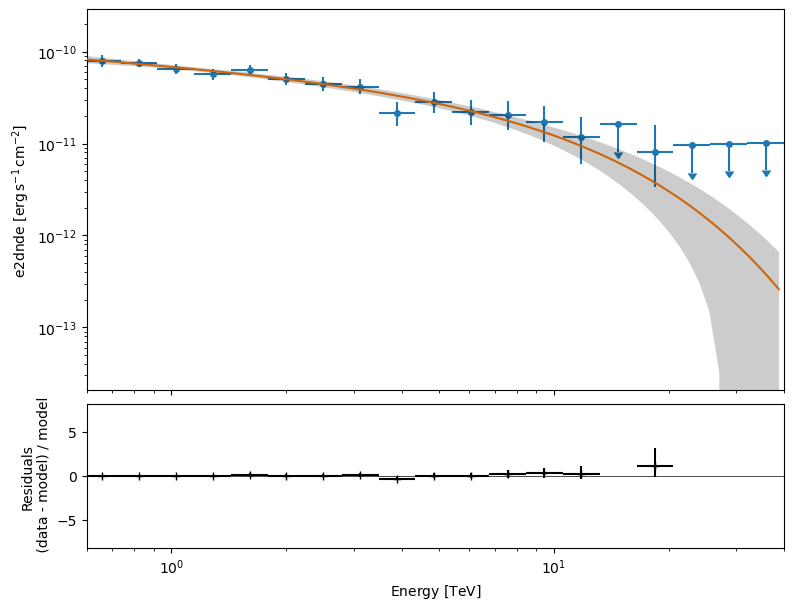

In [34]:
# And let's just plot the sed
flux_points_dataset = FluxPointsDataset(
    data=flux_points, models=model)
ax, _ = flux_points_dataset.plot_fit()

ax.set_xlim(0.6, 40)
plt.show()


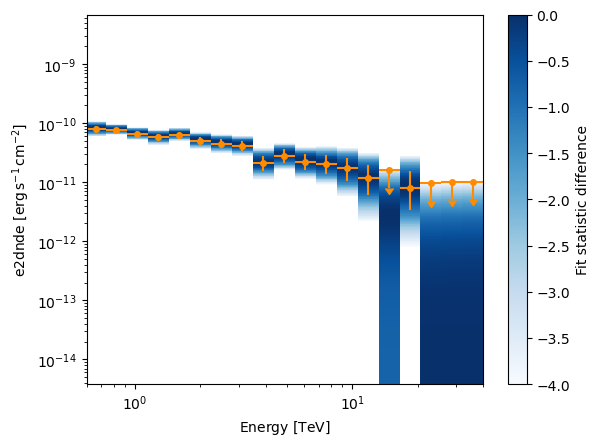

In [35]:
# And we can see the underlying 
fig, ax = plt.subplots()
flux_points.plot(ax=ax, sed_type="e2dnde", color="darkorange")
flux_points.plot_ts_profiles(ax=ax, sed_type="e2dnde")
ax.set_xlim(0.6, 40)
plt.show()


But you could do it differently: instead of a joint fit, you could stack the observations and then fit

In [36]:
dataset_stacked = Datasets(datasets).stack_reduce()

In [37]:
dataset_stacked.models = model
stacked_fit = Fit()
result_stacked = stacked_fit.run([dataset_stacked])
model_best_stacked = model.copy()
print(result_stacked)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 60
	total stat : 8.20

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [38]:
# We can compare both of them
display(model_best_joint.parameters.to_table())

display(model_best_stacked.parameters.to_table())

<Table length=5>
type    name     value         unit        error   ...   max   frozen link prior
str1    str9    float64       str14       float64  ... float64  bool  str1  str1
---- --------- ---------- -------------- --------- ... ------- ------ ---- -----
         index 2.2727e+00                1.566e-01 ...     nan  False           
     amplitude 4.7913e-11 TeV-1 s-1 cm-2 3.600e-12 ...     nan  False           
     reference 1.0000e+00            TeV 0.000e+00 ...     nan   True           
       lambda_ 1.2097e-01          TeV-1 5.382e-02 ...     nan  False           
         alpha 1.0000e+00                0.000e+00 ...     nan   True

<Table length=5>
type    name     value         unit        error   ...   max   frozen link prior
str1    str9    float64       str14       float64  ... float64  bool  str1  str1
---- --------- ---------- -------------- --------- ... ------- ------ ---- -----
         index 2.2964e+00                1.553e-01 ...     nan  False           
     amplitude 4.7819e-11 TeV-1 s-1 cm-2 3.538e-12 ...     nan  False           
     reference 1.0000e+00            TeV 0.000e+00 ...     nan   True           
       lambda_ 1.1393e-01          TeV-1 5.257e-02 ...     nan  False           
         alpha 1.0000e+00                0.000e+00 ...     nan   True

/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/modeling/models/spectral.py:482: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy.center, flux.quantity[:, 0, 0], **kwargs)
/home/willde/anaconda3/envs/gammapy-sexten/lib/python3.12/site-packages/gammapy/modeling/models/spectral.py:482: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy.center, flux.quantity[:, 0, 0], **kwargs)


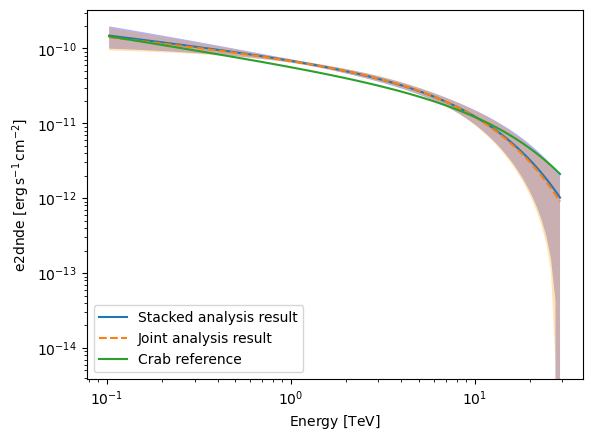

In [39]:
# Let's visualy compare them
fig, ax = plt.subplots()

plot_kwargs = {
    "energy_bounds": [0.1, 30] * u.TeV,
    "sed_type": "e2dnde",
    "ax": ax,
}

# plot stacked model
model_best_stacked.spectral_model.plot(**plot_kwargs, label="Stacked analysis result")
model_best_stacked.spectral_model.plot_error(facecolor="blue", alpha=0.3, **plot_kwargs)

# plot joint model
model_best_joint.spectral_model.plot(
    **plot_kwargs, label="Joint analysis result", ls="--"
)
model_best_joint.spectral_model.plot_error(facecolor="orange", alpha=0.3, **plot_kwargs)

create_crab_spectral_model("hess_ecpl").plot(
    **plot_kwargs,
    label="Crab reference",
)
ax.legend()
plt.show()


#### **1D analysis: Considering the EBL for PKS 2155-304**

In [40]:
# Now we will need little

import astropy.units as u
import matplotlib.pyplot as plt
from gammapy.catalog import SourceCatalog4FGL
from gammapy.datasets import SpectrumDatasetOnOff
from gammapy.estimators import FluxPointsEstimator
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    EBL_DATA_BUILTIN,
    EBLAbsorptionNormSpectralModel,
    GaussianPrior,
    PowerLawSpectralModel,
    SkyModel,
)

We will use 6 observations of the blazars PKS 2155-304 taken in 2008 by H.E.S.S., when it was in a steady state. Following the reflected region bacgkround subtraction described before, the data has already been reduced. We will load it directly as:

In [41]:
dataset = SpectrumDatasetOnOff.read(
    "$GAMMAPY_DATA/PKS2155-steady/pks2155-304_steady.fits.gz"
)

print(dataset)

SpectrumDatasetOnOff
--------------------

  Name                            : stacked 

  Total counts                    : 119 
  Total background counts         : 37.75
  Total excess counts             : 81.25

  Predicted counts                : 44.00
  Predicted background counts     : 44.00
  Predicted excess counts         : nan

  Exposure min                    : 3.80e+05 m2 s
  Exposure max                    : 2.68e+09 m2 s

  Number of total bins            : 10 
  Number of fit bins              : 8 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 109.21

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0

  Total counts_off                : 453 
  Acceptance                      : 8 
  Acceptance off                  : 96 



In [42]:
## First, we check which EBLs are available in gammapy
print(EBL_DATA_BUILTIN.keys())

dict_keys(['franceschini', 'dominguez', 'finke', 'franceschini17', 'saldana-lopez21'])


What we will do is assume that the spectrum originally was a power law, and the observed spectrum should be the convolution between both

In [43]:
index = 2.3
amplitude = 1.81 * 1e-12 * u.Unit("cm-2 s-1 TeV-1")
reference = 1 * u.TeV
pwl = PowerLawSpectralModel(index=index, amplitude=amplitude, reference=reference)
pwl.index.frozen = False
# Specify the redshift of the source
redshift = 0.116

# Load the EBL model. Here we use the model from Dominguez, 2011
absorption = EBLAbsorptionNormSpectralModel.read_builtin("dominguez", redshift=redshift)


# The power-law model is multiplied by the EBL to get the final model
spectral_model = pwl * absorption
print(spectral_model)

## So we create the sky model
sky_model = SkyModel(spatial_model=None, spectral_model=spectral_model, name="pks2155")

dataset.models = sky_model

CompoundSpectralModel
    Component 1 : PowerLawSpectralModel

type    name     value         unit        error   min max frozen link prior
---- --------- ---------- -------------- --------- --- --- ------ ---- -----
         index 2.3000e+00                0.000e+00 nan nan  False           
     amplitude 1.8100e-12 TeV-1 s-1 cm-2 0.000e+00 nan nan  False           
     reference 1.0000e+00            TeV 0.000e+00 nan nan   True           
    Component 2 : EBLAbsorptionNormSpectralModel

type    name      value    unit   error   min max frozen link prior
---- ---------- ---------- ---- --------- --- --- ------ ---- -----
     alpha_norm 1.0000e+00      0.000e+00 nan nan   True           
       redshift 1.1600e-01      0.000e+00 nan nan   True           
    Operator : mul



*Exercise: Derive the flux points for both the intrinsic and observed spectrum. Is it well reproduced? Would you change something?*